## Create Network of DAOs


In [53]:
import networkx as nx
import pandas as pd

import matplotlib.pyplot as plt


Load votes of all proposals in all daos.

In [2]:
## File provided by instructor.
df_votes = pd.read_csv("../data/votes_clean.csv.gz", low_memory=False)

Group by voter.

In [54]:
groups = df_votes.groupby(['voter'])

In [4]:
groups.ngroups

## Note len(groups) is much slower...

986342

Let's have a look at a group in a bit more detail.

In [6]:
IDX = 10

group_id = list(groups.groups)[IDX]

groups.get_group(group_id)

,Unnamed: 0.1,Unnamed: 0,id,ipfs,voter,created,space,proposal,choice,metadata,reason,app,vp,vp_by_strategy,vp_state,cb
75,122,122,0xecef0f90f73fd2d780dec778e5a5eaea785133ba4435...,QmXAsNBjJwHkZ9gz6rVNQW3hnGKo35P1PP3NQxHSrY6xqJ,0x00000000005ef87f8ca7014309ece7260bbcdaeb,1636115373,spartacusdao.eth,0x678cdbfa58790ed11fc241bfd24d15b4364807047465...,1,{},NaN,NaN,111.654927,[111.65492668],final,0


The group contains all the votes by a user. We are interested in the number of unique spaces the user voted in.

In [8]:
vote_space = df_votes[['voter', 'space']]

In [9]:
vote_space.sort_values("voter").head(100)

,voter,space
0,0x0000000000002cb29260612e744ec57d9d1fc5c6,cakevote.eth
1,0x0000000000002cb29260612e744ec57d9d1fc5c6,sushigov.eth
2,0x0000000000025bb48b234f8212f5104d01402f0c,ens.eth
3,0x000000000004d7463d0f9c77383600bc82d612f5,doodles.eth
4,0x000000000004d7463d0f9c77383600bc82d612f5,nftfinance.eth
...,...,...
95,0x0000000002ce79aacd54227d2163ff3791338975,romedaofi.eth
96,0x00000000034b55ebd82cde9b38a85ab0978b7a47,floordao.eth
97,0x00000000034b55ebd82cde9b38a85ab0978b7a47,floordao.eth
98,0x00000000034b55ebd82cde9b38a85ab0978b7a47,floordao.eth


In [10]:
groups = vote_space.groupby(['voter'])

In [67]:
## If you system has low memory, it's a good idea to remove unused
## variables before a computational intensive loop.

## df_votes = None

#### Let's create a weighted undirected graph of DAOs. 

- Nodes are daos an links are users voting in both daos. 
- The weight of the link is the number of common users.

_Note: There are different approaches to create such a network._

In [60]:
# Understanding data structure.
# list(groups['space'])[0]

('0x0000000000002cb29260612e744ec57d9d1fc5c6',
 0    cakevote.eth
 1    sushigov.eth
 Name: space, dtype: object)

In [64]:
G = nx.Graph()

import itertools
## Hint: itertools.combinations could help here.

def add_edges(v):
   ## Your code here.
            

In [65]:
groups['space'].apply(add_edges)

#### Some statistics.

In [13]:
G.number_of_edges(), G.number_of_nodes()

(63791, 883)

In [25]:
## Show all edges with weight.
nx.get_edge_attributes(G, "weight")

{('cakevote.eth', 'sushigov.eth'): 19426,
 ('cakevote.eth', 'pancake'): 722297,
 ('cakevote.eth', 'cakevote.eth'): 4563452,
 ('cakevote.eth', 'opcollective.eth'): 87265,
 ('cakevote.eth', 'rss3.eth'): 1665,
 ('cakevote.eth', 'dpet.eth'): 300,
 ('cakevote.eth', 'fei.eth'): 6250,
 ('cakevote.eth', '1btc.eth'): 4368,
 ('cakevote.eth', 'arbitrum-odyssey.eth'): 185944,
 ('cakevote.eth', 'badgerdao.eth'): 22694,
 ('cakevote.eth', 'balancer.eth'): 94778,
 ('cakevote.eth', 'index-coop.eth'): 3955,
 ('cakevote.eth', 'mstablegovernance.eth'): 8089,
 ('cakevote.eth', 'pickle.eth'): 2384,
 ('cakevote.eth', 'rallygov.eth'): 2435,
 ('cakevote.eth', 'yam.eth'): 9288,
 ('cakevote.eth', 'ybaby.eth'): 3242,
 ('cakevote.eth', 'yearn'): 2365,
 ('cakevote.eth', 'ctcswap.eth'): 27370,
 ('cakevote.eth', 'ethip.eth'): 432926,
 ('cakevote.eth', 'optimismio.eth'): 16170,
 ('cakevote.eth', 'shellprotocol.eth'): 20462,
 ('cakevote.eth', 'zksyncdao.eth'): 117756,
 ('cakevote.eth', 'julswap.eth'): 3712,
 ('cakevote

**Exercise 1**: sort edges by weight.

In [33]:
## Sort edges.
## See: https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.edges.html

# To understand the data structure.
# for i in G.edges(data=True):
#     print(i)

def get_sorted_edges(GG):
    ## Your code here.

sorted_edges = get_sorted_edges(G)

[('pancake', 'pancake', {'weight': 5554317}),
 ('aavegotchi.eth', 'aavegotchi.eth', {'weight': 4825010}),
 ('cakevote.eth', 'cakevote.eth', {'weight': 4563452}),
 ('aave.eth', 'aave.eth', {'weight': 3618222}),
 ('arbitrum-odyssey.eth', 'arbitrum-odyssey.eth', {'weight': 3367310}),
 ('snapshot.dcl.eth', 'snapshot.dcl.eth', {'weight': 2742309}),
 ('aave.eth', 'pancake', {'weight': 1943699}),
 ('uniswap', 'aave.eth', {'weight': 1453691}),
 ('stgdao.eth', 'stgdao.eth', {'weight': 1344686}),
 ('balancer.eth', 'balancer.eth', {'weight': 1061215}),
 ('bancornetwork.eth', 'bancornetwork.eth', {'weight': 979129}),
 ('aavegotchi.eth', 'aave.eth', {'weight': 908386}),
 ('opcollective.eth', 'opcollective.eth', {'weight': 873842}),
 ('balancer.eth', 'aave.eth', {'weight': 867615}),
 ('arbitrum-odyssey.eth', 'aave.eth', {'weight': 867212}),
 ('gitcoindao.eth', 'aave.eth', {'weight': 845381}),
 ('stgdao.eth', 'aave.eth', {'weight': 759758}),
 ('index-coop.eth', 'index-coop.eth', {'weight': 751494}),


**Exercise 2**: remove self-loops.

In [30]:
G_noself = G.copy()

## Your code here.

G.number_of_nodes(), G_noself.number_of_nodes(), G.number_of_edges(), G_noself.number_of_edges()


(883, 883, 63791, 62961)

In [32]:
sorted_edges_noself = get_sorted_edges(G_noself)

[('aave.eth', 'pancake', {'weight': 1943699}),
 ('uniswap', 'aave.eth', {'weight': 1453691}),
 ('aavegotchi.eth', 'aave.eth', {'weight': 908386}),
 ('balancer.eth', 'aave.eth', {'weight': 867615}),
 ('arbitrum-odyssey.eth', 'aave.eth', {'weight': 867212}),
 ('gitcoindao.eth', 'aave.eth', {'weight': 845381}),
 ('stgdao.eth', 'aave.eth', {'weight': 759758}),
 ('cakevote.eth', 'pancake', {'weight': 722297}),
 ('cakevote.eth', 'aave.eth', {'weight': 692499}),
 ('opcollective.eth', 'aave.eth', {'weight': 647866}),
 ('aave.eth', 'lido-snapshot.eth', {'weight': 631106}),
 ('aavegotchi.eth', 'qidao.eth', {'weight': 591656}),
 ('arbitrum-odyssey.eth', 'opcollective.eth', {'weight': 498645}),
 ('badgerdao.eth', 'aave.eth', {'weight': 497854}),
 ('pancake', 'lendhub.eth', {'weight': 488982}),
 ('thegurudao.eth', 'pancake', {'weight': 464040}),
 ('sushigov.eth', 'aave.eth', {'weight': 447464}),
 ('aave.eth', 'snapshot.dcl.eth', {'weight': 446585}),
 ('cakevote.eth', 'ethip.eth', {'weight': 432926}

Let's look at the distribution of weights.

In [35]:
weights =  [link[2]['weight'] for link in sorted_edges]
len(weights)

63791

(array([6.3538e+04, 1.2800e+02, 3.3000e+01, 2.5000e+01, 1.6000e+01,
        4.0000e+00, 4.0000e+00, 7.0000e+00, 8.0000e+00, 4.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 3.0000e+00, 0.0000e+00,
        4.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

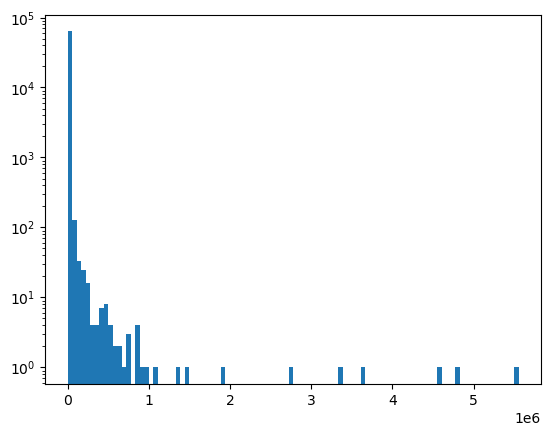

In [36]:
plt.hist(weights, bins=100, log=True)

Let's look at the degree distribution.

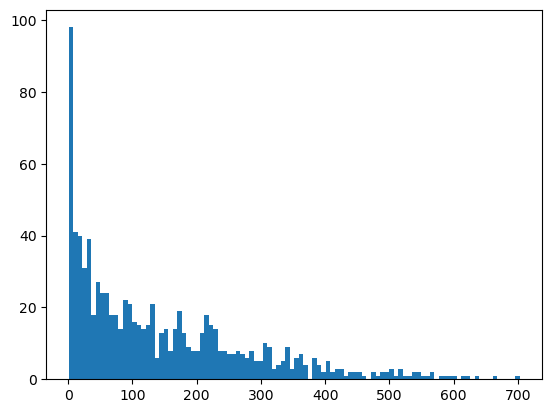

In [37]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees, bins=100)
    # plt.show()

plot_degree_dist(G)

Text(0, 0.5, 'Frequency')

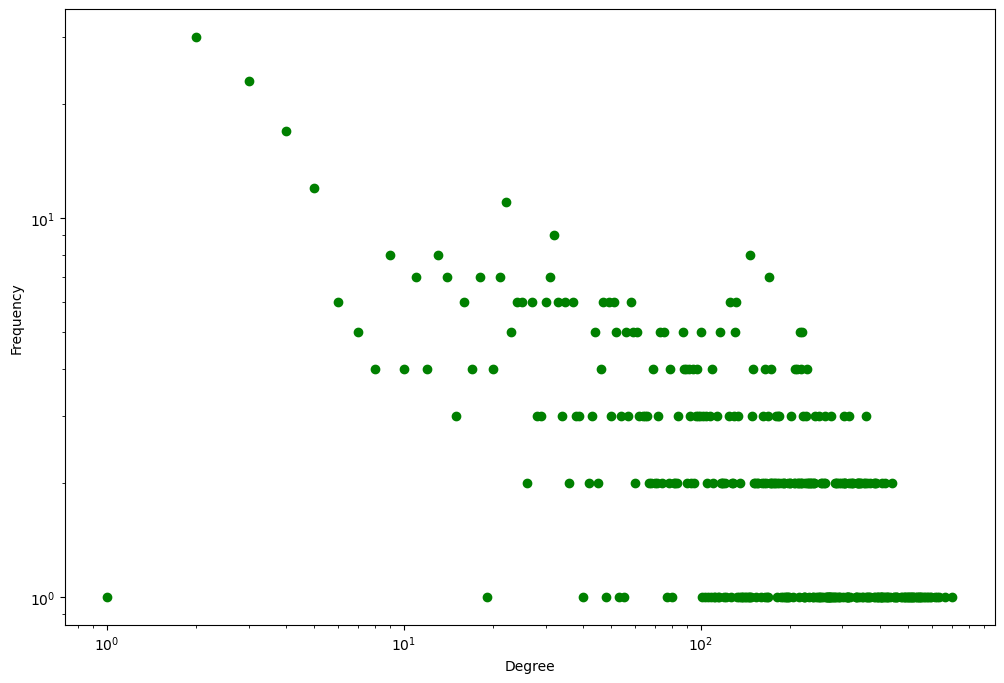

In [40]:
m=1
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees[m:], degree_freq[m:],'go') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

Let's compute some statistics.

In [30]:
nx.density(G)

0.1638174333531072

In [31]:
## Clustering for every node.
## nx.clustering(G)

nx.average_clustering(G)

0.679788342469821

We can compute some statitics only a fully connected graph.

In [32]:
nx.diameter(G)

NetworkXError: Found infinite path length because the graph is not connected

**Exercise 3**: Get the giant connected component.

In [33]:
## Get the giant component.

## Your code here.

# giant_component = ...

In [35]:
## May take a long time.
nx.diameter(giant_component)

4

In [36]:
## May take a long time.
nx.average_shortest_path_length(giant_component)

1.8865591039402627

**Exercise 4**: save the network in a format that can be easily imported in Gephi (e.g., gexf) and as edgelist.

In [13]:
## Your code here.

### Pruning.

**Exercise 5**: Let's remove the edges with lower weights.

_Hint_: pick a suitable value looking at the distribution of weights above.


In [46]:
G2 = G.copy()
print(G2.number_of_edges())

# T = ?
for edge in G2.edges:
   ## Your code here.
  

G2.number_of_edges()
        

63791


5175

Let's export the network to file to import into Gephi for visualization.

In [38]:
nx.write_gexf(G2, "../data/daos_network_pruned_edges_1k.gexf")

The graph is probably still too large to visualize here in NetworkX...

Let's try to plot its giant component.

In [47]:
nodes = max(nx.connected_components(G2), key=len)
H = nx.subgraph(G2, nodes)

In [48]:
H.number_of_edges(), H.number_of_nodes()

(5038, 445)

In [49]:
nx.density(H)

0.05099706448021055

In [50]:
nx.average_clustering(H)

0.6745876647307759

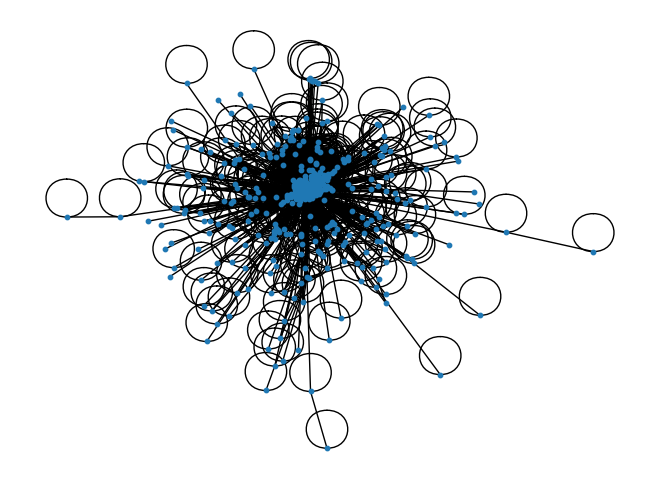

In [51]:
nx.draw_spring(H, node_size=10)

In [52]:
nx.write_gexf(H, "data/daos_network_edges_1000_no_isolates.gexf")